#Choosing the distribution family for Naive Bayes classifier

##**Оглавление**

-------------

### [0. Импорт библиотек](#step0)

###[1. Загрузка датасета digits и breast_cancer из sklearn.datasets](#step1)

###[2. Подготовка матриц признаков X и ответов на обучающих выборках у](#step2)

###[3. Сравнение качества работы наивных байесовских классификаторов на разных семействах распределений:](#step3)
*   *BernoulliNB*
*   *MultinomialNB*
*   *GaussianNB*

###[4. Ответы на вопросы задания.](#step4) 


--------------

<a name = "step0"></a>

#Импорт библиотек

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score
from sklearn import datasets

<a name = "step1"></a>
#Загрузка датасетов
с помощью функции load_digits и load_breast_cancer из sklearn.datasets.

In [4]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

In [5]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [6]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

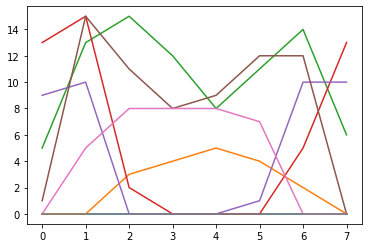

In [12]:
plt.plot(digits.images[0])

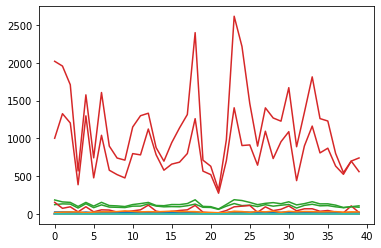

In [20]:
plt.plot(breast_cancer.data[:40])
plt.show()

In [34]:
digits.data[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [36]:
breast_cancer.data[:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

<a name = "step2"></a>
#Подготовка матриц признаков X и ответов на обучающих выборок y (поля data и target)

In [23]:
X_digits = digits.data
y_digits = digits.target

X_breast_cancer = breast_cancer.data
y_breast_cancer = breast_cancer.target

<a name = "step3"></a>

#Сравнение качества работы наивных байесовских классификаторов
на разных семействах распределений
*   *BernoulliNB*
*   *MultinomialNB*
*   *GaussianNB*

In [24]:
Bernoulli = naive_bayes.BernoulliNB()
Multinomial = naive_bayes.MultinomialNB()
Gaussian = naive_bayes.GaussianNB()

##*Для датасета digits*

In [26]:
score_Bernoulli_digits = cross_val_score(Bernoulli, X_digits, y_digits)
score_Bernoulli_digits.mean()

0.8241736304549674

In [27]:
score_Multinomial_digits = cross_val_score(Multinomial, X_digits, y_digits)
score_Multinomial_digits.mean()

0.8703497369235531

In [28]:
score_Gaussian_digits = cross_val_score(Gaussian, X_digits, y_digits)
score_Gaussian_digits.mean()

0.8069281956050759

##*Для датасета breast_cancer*

In [29]:
score_Bernoulli_breast_cancer = cross_val_score(Bernoulli, X_breast_cancer, y_breast_cancer)
score_Bernoulli_breast_cancer.mean()

0.6274181027790716

In [30]:
score_Multinomial_breast_cancer = cross_val_score(Multinomial, X_breast_cancer, y_breast_cancer)
score_Multinomial_breast_cancer.mean()

0.8963204471355379

In [31]:
score_Gaussian_breast_cancer = cross_val_score(Gaussian, X_breast_cancer, y_breast_cancer)
score_Gaussian_breast_cancer.mean()

0.9385188635305075

<a name = "step4"></a>
#Ответы на вопросы задания

*  Вопрос 1:

Каким получилось максимальное качество классификации на датасете breast_cancer?
*  Вопрос 2:

Каким получилось максимальное качество классификации на датасете digits?
*   Вопрос 3:

Выберите верные утверждения и запишите их номера через пробел (в порядке возрастания номера):

1.   ~~На вещественных признаках лучше всего сработал байесовский классификатор с распределением Бернулли~~
2.   ~~На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением.~~
3.  Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков
4.  На вещественных признаках лучше всего сработало нормальное распределение


In [38]:
with open("answer1.txt", "w") as fout:
  fout.write(str(score_Gaussian_breast_cancer.mean()))

with open("answer2.txt", "w") as fout:
  fout.write(str(score_Multinomial_digits.mean()))

with open("answer3.txt", "w") as fout:
  fout.write(str(3) + str(4))